This notebook assumes you are using sims_maf version >= 1.0, and have 'setup sims_maf' in your shell. 

Example of a combination of metricBundles.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

Let's compare the depth in the r-band after 5 years, and the depth after 5 years when the seeing is better than 0.7 arcseconds

In [3]:
filterName = 'r'
goodSeeing = 0.7
sqls = ['filter = "%s" and night < %f' % (filterName, 5.*365.25),
        'filter = "%s" and night < %f and finSeeing < %f'% (filterName, 5.*365.25, goodSeeing)]
print sqls

['filter = "r" and night < 1826.250000', 'filter = "r" and night < 1826.250000 and finSeeing < 0.700000']


In [6]:
# Set up the database connection
opsdb = db.OpsimDatabase('sqlite:///enigma_1189_sqlite.db')
outDir = 'goodseeing_test'
resultsDb = db.ResultsDb(outDir=outDir)

In [7]:
slicer = slicers.HealpixSlicer(lonCol='ditheredRA',latCol='ditheredDec')
summaryMetrics = [metrics.MeanMetric(), metrics.MedianMetric()]

bgroupList = []
names = ['All Visits', 'Good Seeing']
for name,sql in zip(names, sqls):
    metric = metrics.Coaddm5Metric(metricName=name)
    bundle = metricBundles.MetricBundle(metric, slicer, sql, summaryMetrics=summaryMetrics)
    bgroup = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroupList.append(bgroup)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database with constraint filter = "r" and night < 1826.250000
Found 271240 visits
Running:  [0]
Completed metric generation.

/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3738: SAWarning: Textual SQL expression 'filter = "r" and night < ...' should be explicitly declared as text('filter = "r" and night < ...') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
Optimal bin calculation tried to make 478 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting.
monopole: 26.7821  dipole: lon: 79.408, lat: -15.915, amp: 0.112865
Plotting complete.
Querying database with constraint filter = "r" and night < 1826.250000 and finSeeing < 0.700000
Found 78239 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting.
monopole: 26.2776  dipole: lon: 148.571, lat: -72.1713, amp: 0.128093
Plotting complete.


Optimal bin calculation tried to make 255 bins, returning 200


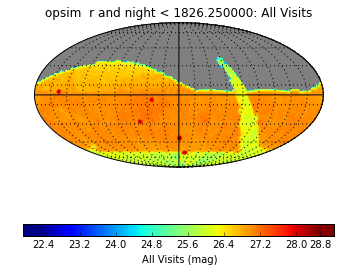

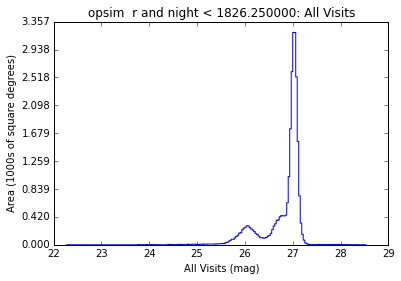

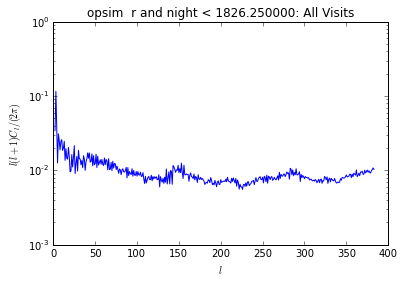

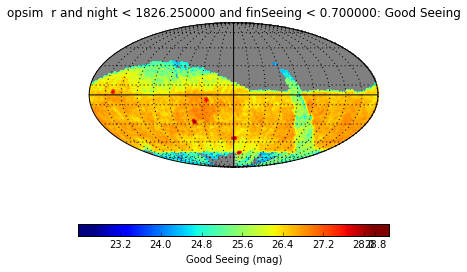

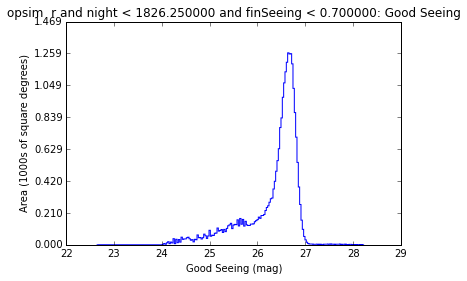

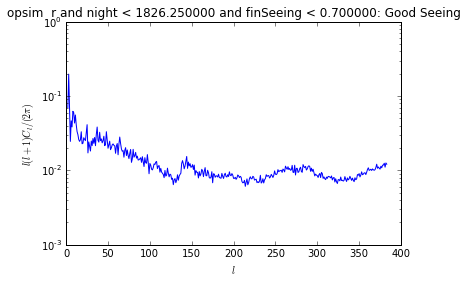

In [8]:
for bgroup in bgroupList:
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

In [9]:
print 'name, mean depth, median depth'
for bundleGroup in bgroupList:
    print bundleGroup.bundleDict[0].metric.name, bundleGroup.bundleDict[0].summaryValues['Mean'], bundleGroup.bundleDict[0].summaryValues['Median']

name, mean depth, median depth
All Visits 26.8017337431 26.9839471164
Good Seeing 26.3201061458 26.5397046034
